# Layer from function and PhC Slab

This example illustrate the use of a function to define the dieletric profile of the unit cell. This is then used to calculate reflection and transmission trhough a Photonic Crystal Slab with circular holes.

The results presented here are respoduciton from the paper: **Fan, Shanhui, and John D. Joannopoulos. "Analysis of guided resonances in photonic crystal slabs." Physical Review B 65.23 (2002): 235112**  [10.1103/PhysRevB.65.235112](https://doi.org/10.1103/PhysRevB.65.235112).

## Import packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import A_FMM

## Structure definition
### Definition of dielectric function

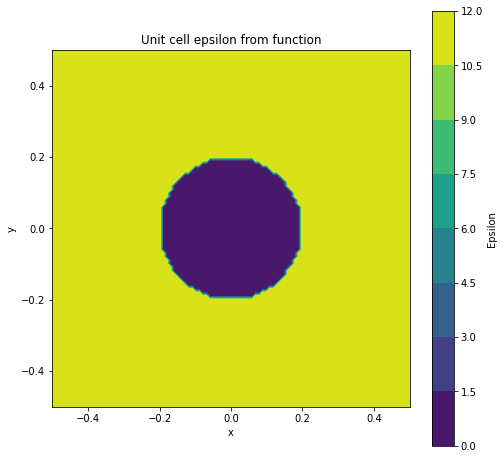

In [9]:
@np.vectorize
def eps_func(x,y, radius):
    if np.sqrt(x**2.0 + y**2.0) < radius:
        return 1.0
    return 12.0

X, Y = np.meshgrid(np.linspace(-0.5, 0.5, 101), np.linspace(-0.5, 0.5, 101), indexing='ij')
EPS = eps_func(X,Y, 0.2)
fig, ax = plt.subplots(1,1, figsize = (8,8))
_ = ax.contourf(X,Y,EPS)
ax.set_xlabel('x'), ax.set_ylabel('y'), ax.set_aspect('equal', 'box'), ax.set_title('Unit cell epsilon from function')
plt.colorbar(_, ax=ax, label='Epsilon')



### Definition of patterned layer

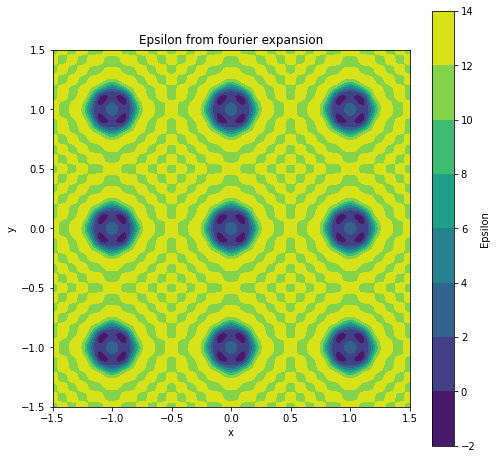

In [10]:
N = 5
slab = A_FMM.Layer_num(N, N, eps_func, args = (0.2,))
_ = np.linspace(-1.5, 1.5, 301)
eps = slab.calculate_epsilon(x=_, y=_)
fig, ax = plt.subplots(1,1, figsize = (8,8))
_ = ax.contourf(np.squeeze(eps['x']), np.squeeze(eps['y']), np.squeeze(eps['eps']))
ax.set_xlabel('x'), ax.set_ylabel('y'), ax.set_aspect('equal', 'box'), ax.set_title('Epsilon from fourier expansion')
plt.colorbar(_, ax=ax, label='Epsilon')


### Definition of uniform layer

In [11]:
air = A_FMM.Layer_uniform(N, N, eps=1.0)

### Definition of 3D structure

(Text(0.5, 0, 'y'),
 Text(0, 0.5, 'z'),
 Text(0.5, 1.0, 'YZ cross section'))

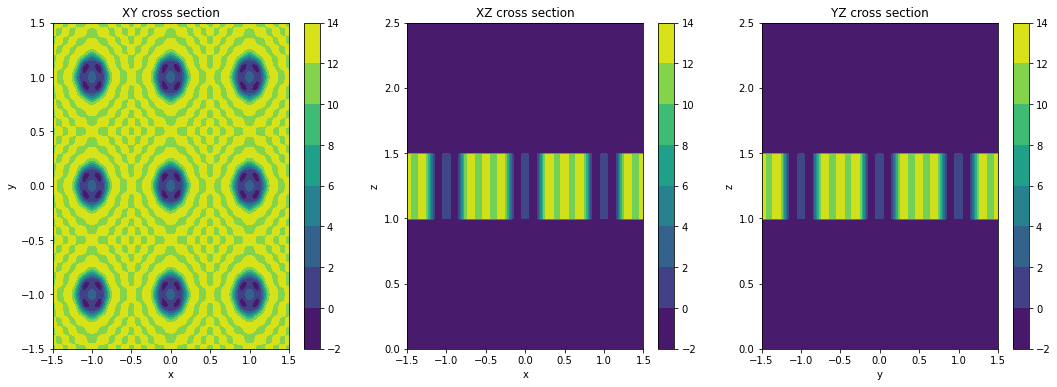

In [12]:
st = A_FMM.Stack(
    layers= [air, slab, air],
    d = [1.0, 0.5, 1.0],
)
_1 = np.linspace(-1.5, 1.5, 301)
_2 = np.linspace(0.0, 2.5, 251)
eps = st.calculate_epsilon(x=_1, y=_1, z=_2)
fig, ax = plt.subplots(1,3, figsize = (18,6))
_ = ax[0].contourf(eps['x'][..., 125], eps['y'][..., 125], eps['eps'][..., 125])
ax[0].set_xlabel('x'), ax[0].set_ylabel('y'), fig.colorbar(_, ax=ax[0]), ax[0].set_title('XY cross section')
ax[1].contourf(eps['x'][:, 151, :], eps['z'][:, 151, :], eps['eps'][:, 151, :])
ax[1].set_xlabel('x'), ax[1].set_ylabel('z'), fig.colorbar(_, ax=ax[1]), ax[1].set_title('XZ cross section')
ax[2].contourf(eps['y'][151, ...], eps['z'][151, ...], eps['eps'][151, ...])
ax[2].set_xlabel('y'), ax[2].set_ylabel('z'), fig.colorbar(_, ax=ax[2]), ax[2].set_title('YZ cross section')

## Performing simulation
### Running simulation and collecting results

In [13]:
freqs = np.linspace(0.25, 0.6, 701)
T, R = [], []
for freq in freqs:
    st.solve(freq)
    T.append(st.get_T(0,0))
    R.append(st.get_R(0,0))


### Plotting results

(Text(0.5, 0, 'Frequency ($2\\pi c/a$)'), Text(0, 0.5, 'Reflection'), None)

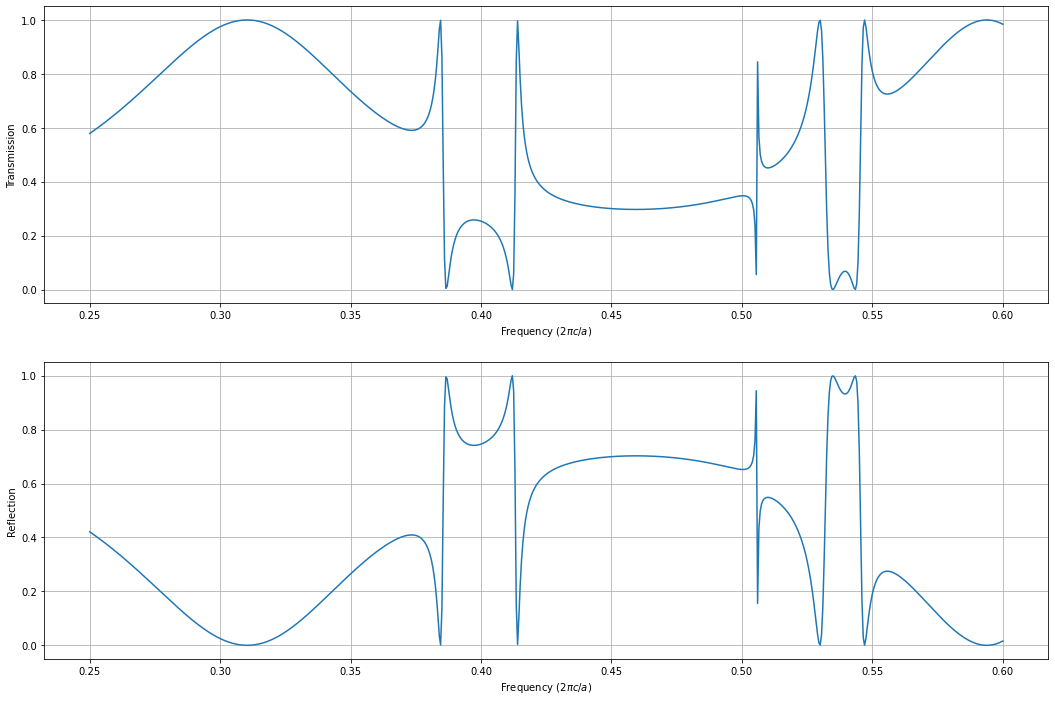

In [17]:
fig, ax = plt.subplots(2,1, figsize = (18,12))
ax[0].plot(freqs, T)
ax[0].set_xlabel(r'Frequency ($2\pi c/a$)'), ax[0].set_ylabel('Transmission'), ax[0].grid()
ax[1].plot(freqs, R)
ax[1].set_xlabel(r'Frequency ($2\pi c/a$)'), ax[1].set_ylabel('Reflection'), ax[1].grid()